In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [ ]:
data.shape

(144, 2)

In [ ]:
data.tail(3)

,Month,#Passengers
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
#parse strings to datetime type
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
indexedData = data.set_index(['Month'])

In [ ]:
indexedData.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


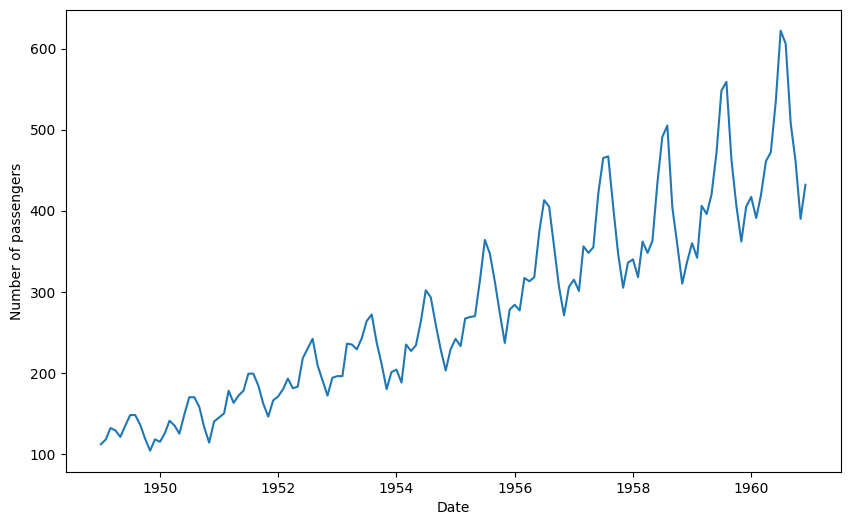

In [ ]:
#plot the graph
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.plot(indexedData)

In [ ]:
#Determining Rolling statistics
rolmean = indexedData.rolling(window=12).mean()
rolstd = indexedData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


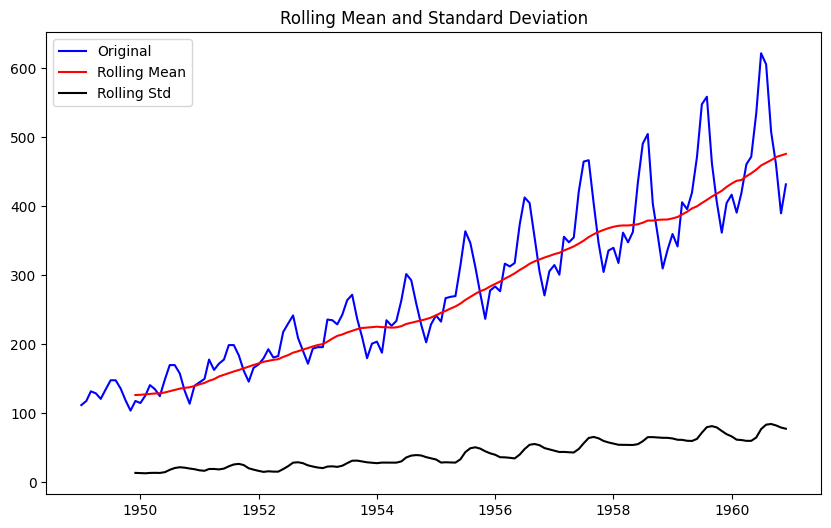

In [ ]:
#plot rolling statistics
orig = plt.plot(indexedData, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(indexedData['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

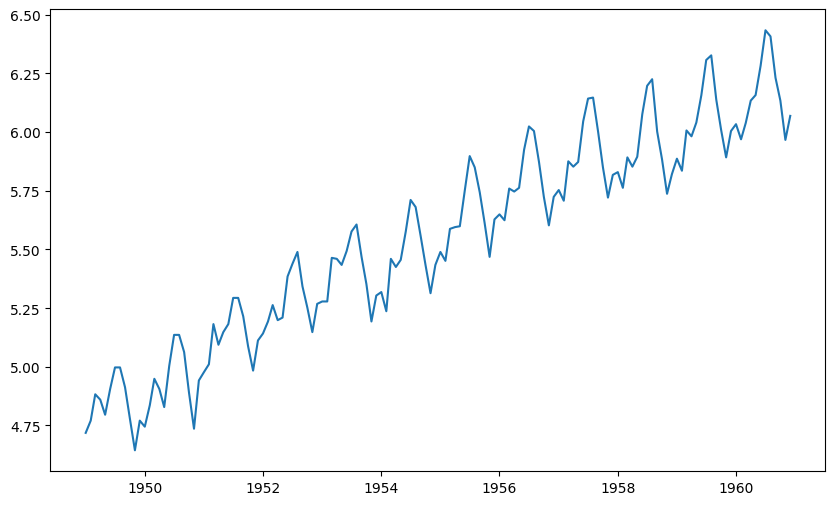

In [ ]:
df_log = np.log(indexedData)
plt.plot(df_log)

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

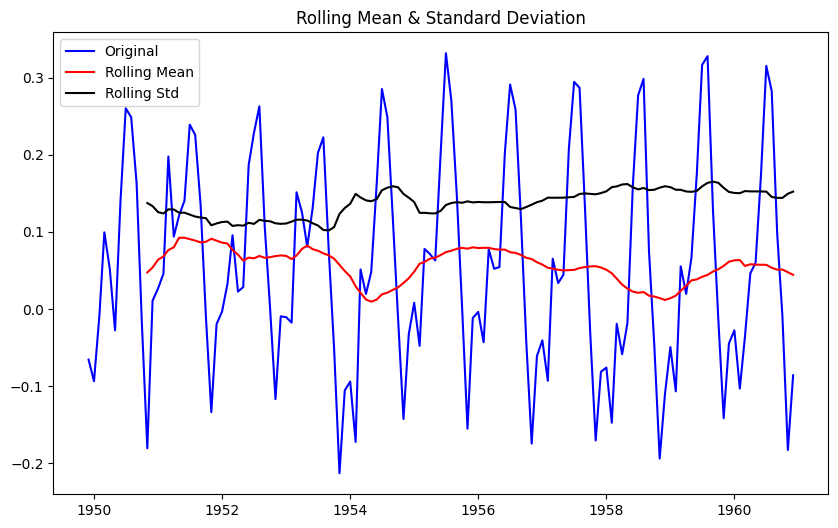

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

As we can see, after subtracting the mean, the rolling mean and standard deviation are approximately horizontal. The p-value is below the threshold of 0.05 and the ADF Statistic is close to the critical values. Therefore, the time series is stationary.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


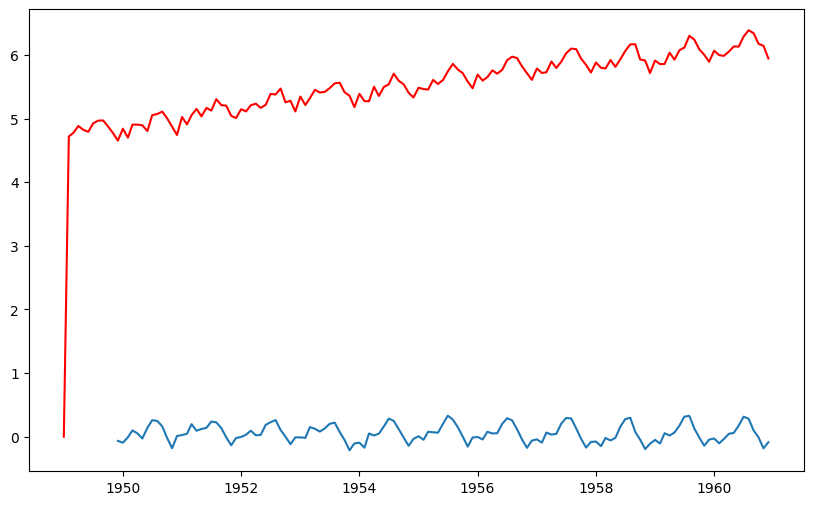

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as smapi

decomposition = seasonal_decompose(df_log) 
model = smapi.tsa.arima.ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_minus_mean)
plt.plot(results.fittedvalues, color='red')

<Axes: xlabel='Month'>

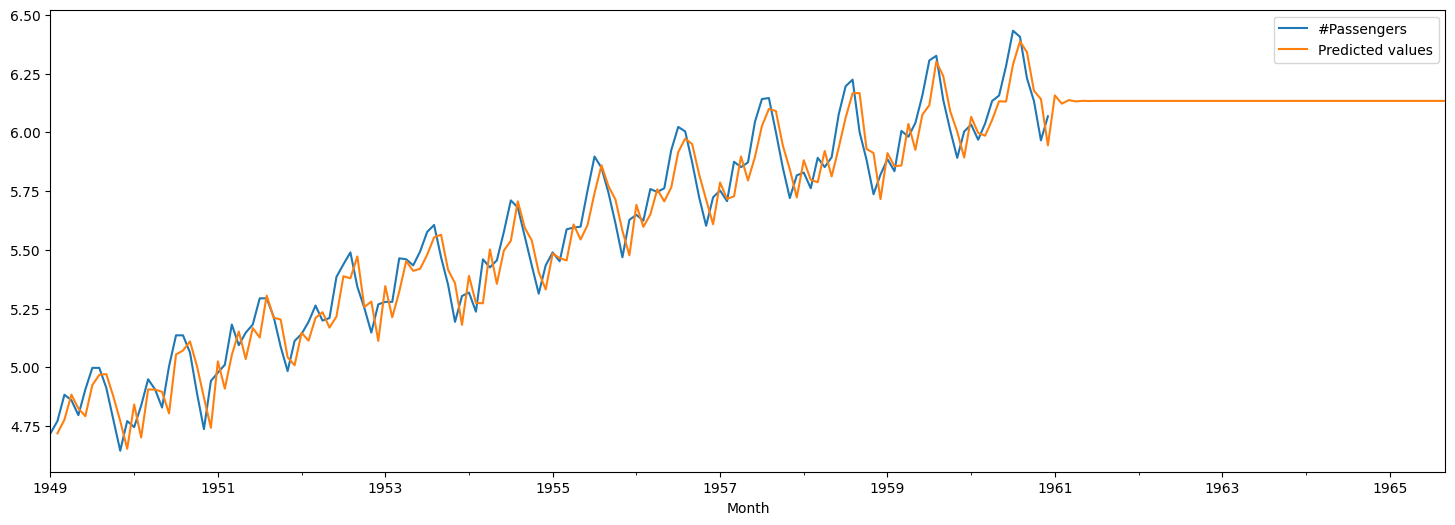

In [58]:

# Predictions for one-year against the test set
predictions = results.predict(1, 200,
                             typ = 'linear')

  
# plot predictions and actual values

df_log.plot(legend = True)
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")